## **Atividade 2 — Aprendizado não Supervisionado**

Nesta atividade, você deve utilizar **métodos de aprendizado não supervisionado** vistos em sala de aula, como **k-means** ou **redes SOM**, para **identificar padrões nos dados de engajamento**.

O objetivo é compreender **quais tópicos, padrões ou grupos de postagens** estão mais associados a alto ou baixo engajamento.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans # Importa o algoritmo K-Means
from sklearn.preprocessing import StandardScaler # Para escalonar os dados
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns

!gdown 19Y-NdpOTCfmtlM66FqodAtiZMs8lGQTq
try:
    df = pd.read_pickle('df_social_data_train.pkl')
except FileNotFoundError:
    print("Arquivo 'df_social_data_train.pkl' não encontrado. Certifique-se de que ele está no diretório correto ou baixe-o.")
    exit()

Downloading...
From: https://drive.google.com/uc?id=19Y-NdpOTCfmtlM66FqodAtiZMs8lGQTq
To: /content/df_social_data_train.pkl
100% 8.92M/8.92M [00:00<00:00, 34.8MB/s]


In [2]:
df = df.dropna(subset=['content', 'reactions', 'comments', 'engagement', 'anon_id'])
print("Gerando embeddings para o conteúdo do texto. Isso pode demorar...")
model_st = SentenceTransformer("all-MiniLM-L6-v2")
df['content_features'] = list(model_st.encode(df['content'].tolist(), show_progress_bar=True))
df

Gerando embeddings para o conteúdo do texto. Isso pode demorar...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/704 [00:00<?, ?it/s]

,anon_id,content,reactions,comments,score,engagement,content_features
0,afb338bc4e80e811be481b27807934c5,Robert Lerman writes that achieving a healthy...,12,1,13,low,"[-0.011695284, 0.02785928, 0.036047444, -0.030..."
1,afb338bc4e80e811be481b27807934c5,"National disability advocate Sara Hart Weir, ...",11,0,11,low,"[-0.02623733, -0.06488712, -0.007863777, 0.097..."
3,afb338bc4e80e811be481b27807934c5,Exploring in this months Talent Management & H...,44,0,44,low,"[-0.023109002, -0.020342559, 0.035548184, -0.0..."
4,afb338bc4e80e811be481b27807934c5,I count myself fortunate to have spent time wi...,22,2,24,low,"[-0.054384463, 0.0031936867, -0.06155944, 0.01..."
5,afb338bc4e80e811be481b27807934c5,Online job platforms are a different way of wo...,21,1,22,low,"[-0.068378225, -0.062780656, -0.010365994, -0...."
...,...,...,...,...,...,...,...
23803,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @AaronBerson ! I w...,5,0,5,low,"[-0.074029945, 0.008327099, 0.005020871, 0.041..."
23804,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @MikeMax32CPA abou...,3,0,3,low,"[-0.039110135, 0.0067848046, -0.011407465, 0.0..."
23805,ecc9ab53ac5a897358b35118221ea367,Love! #radicalcpa,76,3,79,low,"[-0.06677414, -0.011888947, 0.0026476763, -0.0..."
23806,ecc9ab53ac5a897358b35118221ea367,Did you know next year is going to be the best...,1,0,1,low,"[-0.07542417, 0.017530885, 0.023634885, -0.043..."


In [3]:
X_content_features = np.array(df['content_features'].tolist())
X_numerical_features = df[['reactions', 'comments']].values
# Concatenar as features textuais e numéricas para o clustering
X_clustering = np.hstack((X_content_features, X_numerical_features))
print(f"\nDimensão das features para clustering (X_clustering): {X_clustering.shape}")


Dimensão das features para clustering (X_clustering): (22513, 386)


In [4]:
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)


Calculando inércia para diferentes números de clusters (K)...


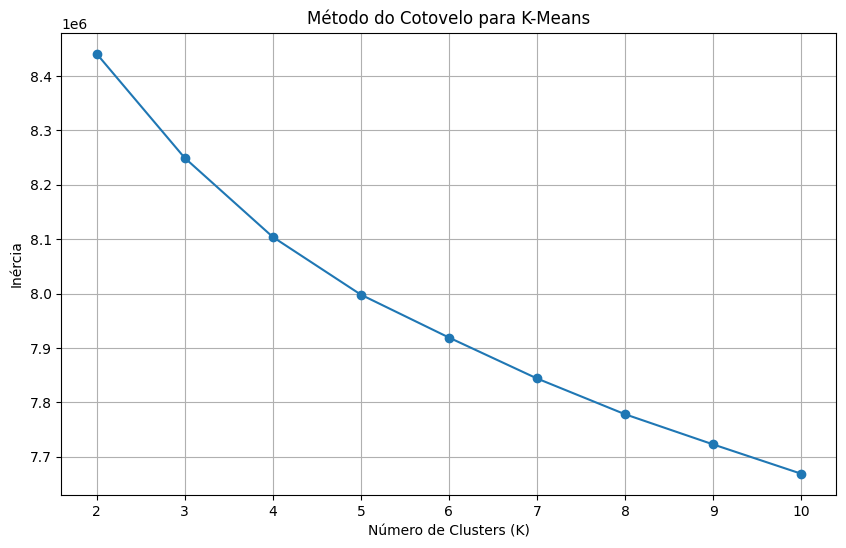


Analise o gráfico do cotovelo acima para escolher um valor de K.
Um bom ponto de 'cotovelo' sugere um número ideal de clusters.


In [5]:
inertia = []
possible_k_values = range(2, 11) # Experimentar K de 2 a 10

print("\nCalculando inércia para diferentes números de clusters (K)...")
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init para evitar inicializações ruins
    kmeans.fit(X_clustering_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Método do Cotovelo para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

print("\nAnalise o gráfico do cotovelo acima para escolher um valor de K.")
print("Um bom ponto de 'cotovelo' sugere um número ideal de clusters.")



---
Pela analise do grafico podemos ver que a inércia começa a diminuir mais lentamentente em torno de 6 clustes, com isso nosso numero de clusters escolhidos foi 6.


In [6]:
chosen_k = 6
print(f"\nAplicando K-Means com K = {chosen_k}...")
kmeans_final = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
df['cluster_label'] = kmeans_final.fit_predict(X_clustering_scaled)

print("\nAgrupamento K-Means concluído. Labels de cluster adicionadas ao DataFrame.")
print(df[['reactions', 'comments', 'engagement', 'cluster_label']].head())


Aplicando K-Means com K = 6...

Agrupamento K-Means concluído. Labels de cluster adicionadas ao DataFrame.
   reactions  comments engagement  cluster_label
0         12         1        low              0
1         11         0        low              2
3         44         0        low              4
4         22         2        low              2
5         21         1        low              3



--- Análise dos Clusters em relação ao Engajamento ---

Distribuição de Engajamento por Cluster:
engagement         high       low
cluster_label                    
0              0.270629  0.729371
1              0.159959  0.840041
2              0.269928  0.730072
3              0.200519  0.799481
4              0.093484  0.906516
5              0.238815  0.761185


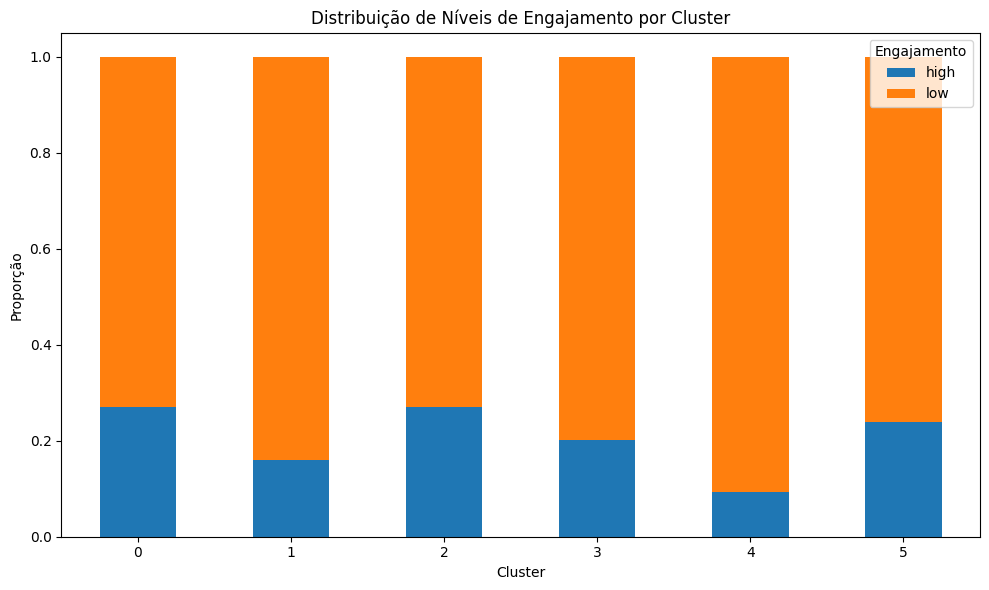

In [7]:
print("\n--- Análise dos Clusters em relação ao Engajamento ---")

# Mapear 'engagement' para numérico para facilitar o cálculo de médias/somas
df['engagement_numeric'] = df['engagement'].map({'low': 0, 'high': 1})

# Análise de Engajamento por Cluster
print("\nDistribuição de Engajamento por Cluster:")
engagement_by_cluster = df.groupby('cluster_label')['engagement'].value_counts(normalize=True).unstack(fill_value=0)
print(engagement_by_cluster)

# Visualização da Distribuição de Engajamento por Cluster
engagement_by_cluster.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de Níveis de Engajamento por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.legend(title='Engajamento')
plt.tight_layout()
plt.show()

In [8]:
print("\nCaracterísticas Médias por Cluster:")
# Para as características numéricas originais (não escaladas)
cluster_means = df.groupby('cluster_label')[['reactions', 'comments', 'engagement_numeric']].mean()
print(cluster_means)
df


Características Médias por Cluster:
                reactions   comments  engagement_numeric
cluster_label                                           
0              281.837181  17.574411            0.270629
1              146.008186  11.810709            0.159959
2              900.579464  44.818605            0.269928
3              204.126589  20.315175            0.200519
4              161.064751   8.323756            0.093484
5              145.468809  14.862634            0.238815


,anon_id,content,reactions,comments,score,engagement,content_features,cluster_label,engagement_numeric
0,afb338bc4e80e811be481b27807934c5,Robert Lerman writes that achieving a healthy...,12,1,13,low,"[-0.011695284, 0.02785928, 0.036047444, -0.030...",0,0
1,afb338bc4e80e811be481b27807934c5,"National disability advocate Sara Hart Weir, ...",11,0,11,low,"[-0.02623733, -0.06488712, -0.007863777, 0.097...",2,0
3,afb338bc4e80e811be481b27807934c5,Exploring in this months Talent Management & H...,44,0,44,low,"[-0.023109002, -0.020342559, 0.035548184, -0.0...",4,0
4,afb338bc4e80e811be481b27807934c5,I count myself fortunate to have spent time wi...,22,2,24,low,"[-0.054384463, 0.0031936867, -0.06155944, 0.01...",2,0
5,afb338bc4e80e811be481b27807934c5,Online job platforms are a different way of wo...,21,1,22,low,"[-0.068378225, -0.062780656, -0.010365994, -0....",3,0
...,...,...,...,...,...,...,...,...,...
23803,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @AaronBerson ! I w...,5,0,5,low,"[-0.074029945, 0.008327099, 0.005020871, 0.041...",2,0
23804,ecc9ab53ac5a897358b35118221ea367,Check out my interview with @MikeMax32CPA abou...,3,0,3,low,"[-0.039110135, 0.0067848046, -0.011407465, 0.0...",2,0
23805,ecc9ab53ac5a897358b35118221ea367,Love! #radicalcpa,76,3,79,low,"[-0.06677414, -0.011888947, 0.0026476763, -0.0...",2,0
23806,ecc9ab53ac5a897358b35118221ea367,Did you know next year is going to be the best...,1,0,1,low,"[-0.07542417, 0.017530885, 0.023634885, -0.043...",4,0




---
**Análise dos resultados pré LLM**

Clusters 0 e 2 apresentam maior porcentagem de engajamento alto, o Cluster 4 apresenta a menor porcentagem de engajamento alto. Analisando a relação entre o engajamento com reactions e comments, podemos verificar que o cluster 4 apresenta menor quantidade de comments e também é o cluster com menor engajamento, porém apresenta mais reactions que o cluster 5, que apresenta por sua vez um engajamento maior que o cluster 4.Para analisar melhor essa relação entre o engajamento e suas outras métricas, foi montado um gráfico de barras comparando todas as métricas.



[0, 1, 2, 3, 4, 5]
[281.8371807465619, 146.00818553888132, 900.5794641371276, 204.126588845655, 161.06475111290976, 145.468809073724]
[17.57441060903733, 11.810709413369713, 44.81860542519554, 20.315175097276263, 8.323755564548765, 14.862633900441084]
[27.062868369351673, 15.995907230559345, 26.992844067232486, 20.051880674448768, 9.34844192634561, 23.881537492123503]


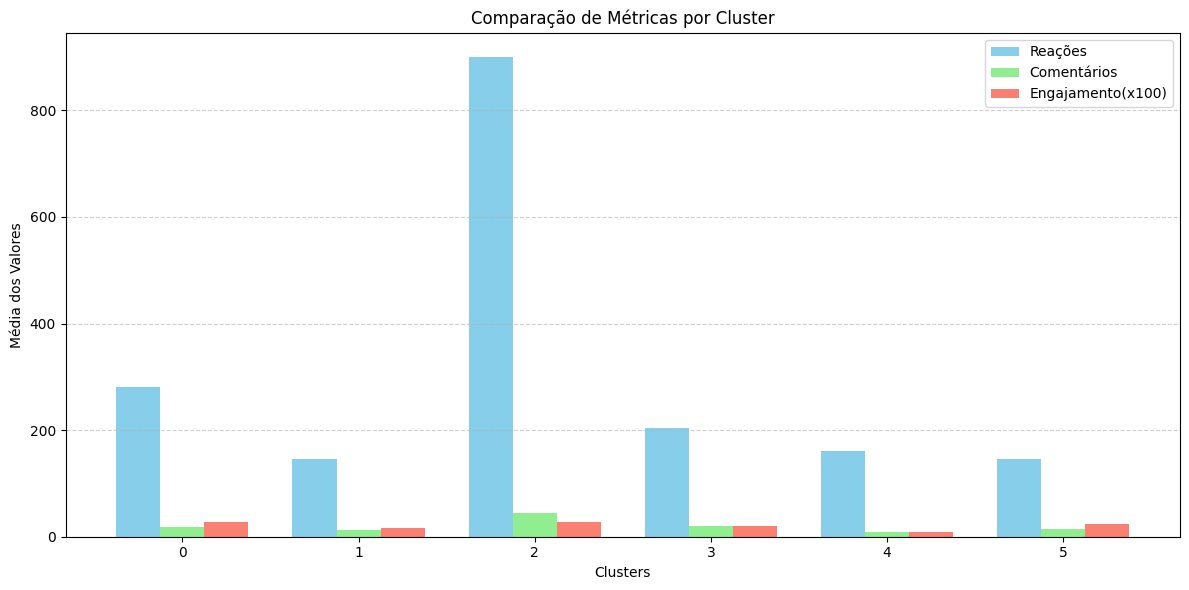

In [9]:
cluster_label = sorted(df['cluster_label'].unique().tolist())
print(cluster_label)
cluster_reactions = df.groupby('cluster_label')['reactions'].mean().sort_index().tolist()
print(cluster_reactions)
cluster_comments = df.groupby('cluster_label')['comments'].mean().sort_index().tolist()
print(cluster_comments)
cluster_engagement = df.groupby('cluster_label')['engagement_numeric'].mean().sort_index().tolist()
cluster_engagement = [e * 100 for e in cluster_engagement] # x100 para ser visivel no grafico, valoresd de engagemente_numeric muito baixo.
print(cluster_engagement)

n_clusters = len(cluster_label)
x = np.arange(n_clusters)
width = 0.25
plt.figure(figsize=(12, 6))
plt.bar(x - width, cluster_reactions, width, label='Reações', color='skyblue')
plt.bar(x, cluster_comments, width, label='Comentários', color='lightgreen')
plt.bar(x + width, cluster_engagement, width, label='Engajamento(x100)', color='salmon')
plt.xlabel('Clusters')
plt.ylabel('Média dos Valores')
plt.title('Comparação de Métricas por Cluster')
plt.xticks(x, cluster_label)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

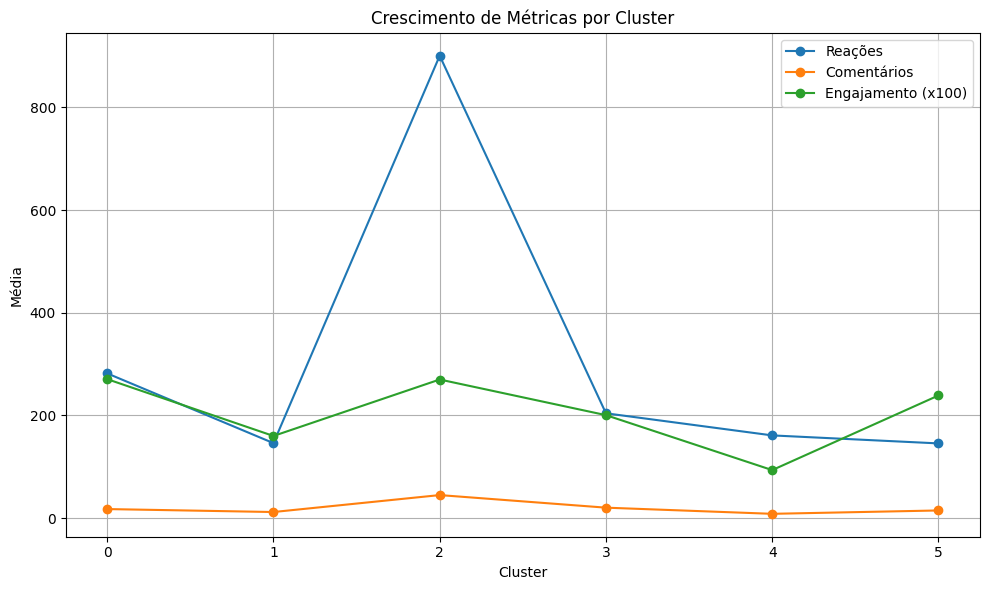

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_label, cluster_reactions, marker='o', label='Reações')
plt.plot(cluster_label, cluster_comments, marker='o', label='Comentários')
plt.plot(cluster_label, [e * 10 for e in cluster_engagement], marker='o', label='Engajamento (x100)')
plt.xlabel('Cluster')
plt.ylabel('Média')
plt.title('Crescimento de Métricas por Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos analisar algumas métricas, do cluster 0 para o cluster 1 há uma diminuição nas reações e os comentários se mantém, tendo uma queda no engajamento similar a queda das reações. Do cluster 1 para o 2 há um aumento significativo nas reações e um leve aumento nos comentários porém o engajamento sobe consideravelmente.Podemos ver também que do cluster 3 para o 4 não há grandes mudanças nas reações e comentários, porém há uma queda significativa no engajamento, o contrário ocorre para o cluster 4 e 5 em que não há mudanças significativas entre as reações e os comentários desses clusters, porém há um aumento significativo do engajamento.
Podemos concluir que apesar das métricas de reações e comentários contribuírem para definir o engajamento, podemos concluir que o engajamento também depende do conteúdo da publicação.





---


## Utilizar LLM para interpretar os clusters









In [11]:
!pip install openai==0.28


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.93.0
    Uninstalling openai-1.93.0:
      Successfully uninstalled openai-1.93.0


In [12]:
from getpass import getpass
import openai

def llm_local():
  modo_local = input("Deseja usar uma LLM local? (s/n): ").strip().lower()

  if modo_local == 's':
      # Configuração para Ollama local
      openai.api_base = "http://localhost:11434/v1"
      openai.api_key = "ollama"  # Requerido por algumas bibliotecas mesmo que não usado
  else:
      # Configuração para OpenAI
      openai.api_base = "https://api.openai.com/v1"
      openai.api_key = getpass("Digite sua chave de API da OpenAI: ")

llm_local()

Deseja usar uma LLM local? (s/n): s


In [13]:
import json

def llm_task(model, system, prompt):
  response = openai.ChatCompletion.create(
      model=model,
      messages = [
            {
              "role": "system",
              "content": system
            },
            {
              "role": "user",
              "content": prompt
            },
          ]

  )
  s = response['choices'][0]['message']['content'].strip()

  return s

In [14]:
# baixando e instalando o ollama
!curl -fsSL https://ollama.com/install.sh | sh
!pip install ollama
!nohup ollama serve &

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
nohup: appending output to 'nohup.out'


In [15]:
# ativando o servidor de LLM
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [16]:
# baixando uma LLM (llama3.1)
!ollama pull llama3.1

In [17]:
llm_local()

Deseja usar uma LLM local? (s/n): s


In [18]:
system = '''
Você é um analista de posts em redes sociais.
A partir de uma lista de posts, você deve:
1) identificar o tema geral dos posts
2) identificar os tópicos mais relevantes nos posts.
3) cada tópico deve ser formado 2 ou 3 palavras
A saída da análise deve ser estruturada em JSON.

Exemplo de Estrutura do JSON:

```json
{
  "tema_geral": "texto do tema geral",
  "topicos_relevantes": ["topico A","topico B","topico C"]
}
```

A resposta deve ser em português e APENAS EM JSON.
Não retorne nada além do JSON.
'''





In [28]:
print(len(cluster_label))
L = []
for cluster in cluster_label:
  print("Gerando analise do cluster",cluster)
  prompt = ''
  df_temp = df[df.cluster_label == cluster]
  for index,row in df_temp.iterrows():
    prompt += f'#Post: {row.content} ####\n\n\n'
  resposta = llm_task("llama3.1",system,prompt)
  print(resposta)
  json_str = resposta.replace("```json","").replace("```","")
  print(json_str)
  obj = json.loads(json_str)
  print(obj)
  df_temp['tema_geral'] = obj['tema_geral']
  df_temp['topicos_relevantes'] = str(list(obj['topicos_relevantes']))
  L.append(df_temp)
  print("======")

6
Gerando analise do cluster 0
{
  "tema_geral": "desempenho no trabalho",
  "topicos_relevantes": ["EmocionalInteligencia", "Emprego e Carioca","MentalHealth", "FeedbackConstrutivo", "Produtividade", "TrabalhoRemoto", "CuidadoresProfissionais", "Equilíbrio Trabalho-Vida"]
}
{
  "tema_geral": "desempenho no trabalho",
  "topicos_relevantes": ["EmocionalInteligencia", "Emprego e Carioca","MentalHealth", "FeedbackConstrutivo", "Produtividade", "TrabalhoRemoto", "CuidadoresProfissionais", "Equilíbrio Trabalho-Vida"]
}
{'tema_geral': 'desempenho no trabalho', 'topicos_relevantes': ['EmocionalInteligencia', 'Emprego e Carioca', 'MentalHealth', 'FeedbackConstrutivo', 'Produtividade', 'TrabalhoRemoto', 'CuidadoresProfissionais', 'Equilíbrio Trabalho-Vida']}
Gerando analise do cluster 1


/tmp/ipython-input-28-756892554.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['tema_geral'] = obj['tema_geral']
/tmp/ipython-input-28-756892554.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['topicos_relevantes'] = str(list(obj['topicos_relevantes']))


{
  "tema_geral": "Saúde e Tecnologia",
  "topicos_relevantes": [
    "Prevenção de Erros Médicos",
    "Uso de Técnicas Inteligentes",
    "Privatização da Saúde",
    "COVID-19",
    "Tecnologia em Saúde",
    "Tratamento Digital",
    "Saúde Global",
    "Mudança Cultural na Saúde",
    "Desenvolvimento Sustentável",
    "Inovação em Médicos",
    "Avaliação de Risco"
  ]
}
{
  "tema_geral": "Saúde e Tecnologia",
  "topicos_relevantes": [
    "Prevenção de Erros Médicos",
    "Uso de Técnicas Inteligentes",
    "Privatização da Saúde",
    "COVID-19",
    "Tecnologia em Saúde",
    "Tratamento Digital",
    "Saúde Global",
    "Mudança Cultural na Saúde",
    "Desenvolvimento Sustentável",
    "Inovação em Médicos",
    "Avaliação de Risco"
  ]
}
{'tema_geral': 'Saúde e Tecnologia', 'topicos_relevantes': ['Prevenção de Erros Médicos', 'Uso de Técnicas Inteligentes', 'Privatização da Saúde', 'COVID-19', 'Tecnologia em Saúde', 'Tratamento Digital', 'Saúde Global', 'Mudança Cultural na

In [21]:
df = pd.concat(L)
df


,anon_id,content,reactions,comments,score,engagement,content_features,cluster_label,engagement_numeric,tema_geral,topicos_relevantes
18403,211c3e2ce7263c2ed0fc44c59065b398,And it runs true in the workplace too.,2,0,2,low,"[0.009834867, 0.0149642695, 0.009080213, 0.032...",0,0,Saúde mental em trabalho,"['Mental Health', 'Trabalho sob pressão', 'Equ..."
11095,8bf50b463fb42a05b3cc3ae18440fd58,You’re sure to find a suggestion that resonate...,2,0,2,low,"[-0.013673296, -0.037335675, 0.028398337, -0.0...",0,0,Saúde mental em trabalho,"['Mental Health', 'Trabalho sob pressão', 'Equ..."
15280,33b7a00344a9963da684b57ae8a9320c,"I'm sure it's very different for many people, ...",862,44,906,high,"[0.0099582, -0.061630376, 0.045992367, 0.08056...",0,1,Saúde mental em trabalho,"['Mental Health', 'Trabalho sob pressão', 'Equ..."
20575,5a3e559348d12bd6597d3c4ea5dfbc3b,How to Think For Yourself in the Age of Expert...,12,2,14,low,"[0.01775881, -0.018341534, -0.0075352397, -0.0...",0,0,Saúde mental em trabalho,"['Mental Health', 'Trabalho sob pressão', 'Equ..."
12364,4db7269e4ce343f22df75d1bf80cac14,When Satya Nadella took over as CEO of Microso...,94,4,98,low,"[0.00735745, -0.019365754, -0.0050359345, -3.6...",0,0,Saúde mental em trabalho,"['Mental Health', 'Trabalho sob pressão', 'Equ..."
...,...,...,...,...,...,...,...,...,...,...,...
6271,54b0006cd12d78e8df60a252fa06a169,From Bloomberg Economics #economy #markets,251,20,271,high,"[0.023514573, -0.029344011, -0.029296529, 0.09...",5,1,Economia e Finanças,"['Market e Bancos', 'Bitcoin e Crypto', 'Impac..."
28,afb338bc4e80e811be481b27807934c5,We've known since the Great Depression that si...,10,0,10,low,"[-0.027895868, -0.003970343, 0.08021074, 0.052...",5,0,Economia e Finanças,"['Market e Bancos', 'Bitcoin e Crypto', 'Impac..."
21477,6930e03168c83d57b6b29e9532aebfe2,"of course, a AWS had announced a availability ...",12,0,12,low,"[0.017219828, -0.045629706, 0.02983476, 0.0363...",5,0,Economia e Finanças,"['Market e Bancos', 'Bitcoin e Crypto', 'Impac..."
14605,d98adf61c86b3074fc0cdaf23cf1b4be,Great Sunday (or Monday) read from Edward Whi...,43,1,44,low,"[0.03642476, 0.04353925, 0.07315258, 0.0279903...",5,0,Economia e Finanças,"['Market e Bancos', 'Bitcoin e Crypto', 'Impac..."


In [22]:
for cluster_id in sorted(df['cluster_label'].unique()):
    print(f"\n===== CLUSTER {cluster_id} =====")

    # Filtrar o DataFrame para o cluster atual
    cluster_df = df[df['cluster_label'] == cluster_id]

    # Verificar se há linhas suficientes para amostrar
    num_samples = min(10, len(cluster_df))

    if num_samples > 0:
        # Pegar amostras aleatórias
        # Seleciona apenas as colunas de interesse para mostrar
        sampled_rows = cluster_df[['content', 'reactions', 'comments', 'engagement','tema_geral']].sample(n=num_samples, random_state=42)

        # Imprimir as linhas amostradas
        for index, row in sampled_rows.iterrows():
            print(f"  - Content: {row['content'][:150]}...") # Limita o texto para legibilidade
            print(f"    Reactions: {row['reactions']}, Comments: {row['comments']}, Engagement: {row['engagement']}, Tema: {row['tema_geral']}")
            print("-" * 30)



===== CLUSTER 0 =====
  - Content: 50 Things I did before I turned 50/ Happy! #50things #writing #happiness #depressed #50...
    Reactions: 844, Comments: 111, Engagement: high, Tema: Saúde mental em trabalho
------------------------------
  - Content: 168 hours are in a week. But when I’m stressed and feeling overwhelmed, I don’t feel like I have any time. It’s time to find a few more hours this wee...
    Reactions: 91, Comments: 0, Engagement: low, Tema: Saúde mental em trabalho
------------------------------
  - Content: In high-pressure situations, it doesn’t take much for even the most confident and capable of us to buckle. When we do, our minds tend to kick into neg...
    Reactions: 53, Comments: 1, Engagement: low, Tema: Saúde mental em trabalho
------------------------------
  - Content: וואו איך אני אתחיל? שבוע שעבר העברתי שני וובינרים למחפשי עבודה והבנתי משהו. שלפעמים, יש לך רק שאלה ווובינר לא מכסה הכל וצריך את הייעוץ האישי הזה את הת...
    Reactions: 363, Comments: 46, E

['Economia e Finanças', 'Negócios e Tecnologia', 'Redes Sociais', 'Saúde e Tecnologia', 'Saúde mental em trabalho', 'negócios e tecnologia']

Distribuição de Engajamento por tema:
engagement                    high       low
tema_geral                                  
Economia e Finanças       0.266667  0.733333
Negócios e Tecnologia     0.300000  0.700000
Redes Sociais             0.266667  0.733333
Saúde e Tecnologia        0.133333  0.866667
Saúde mental em trabalho  0.266667  0.733333
negócios e tecnologia     0.100000  0.900000


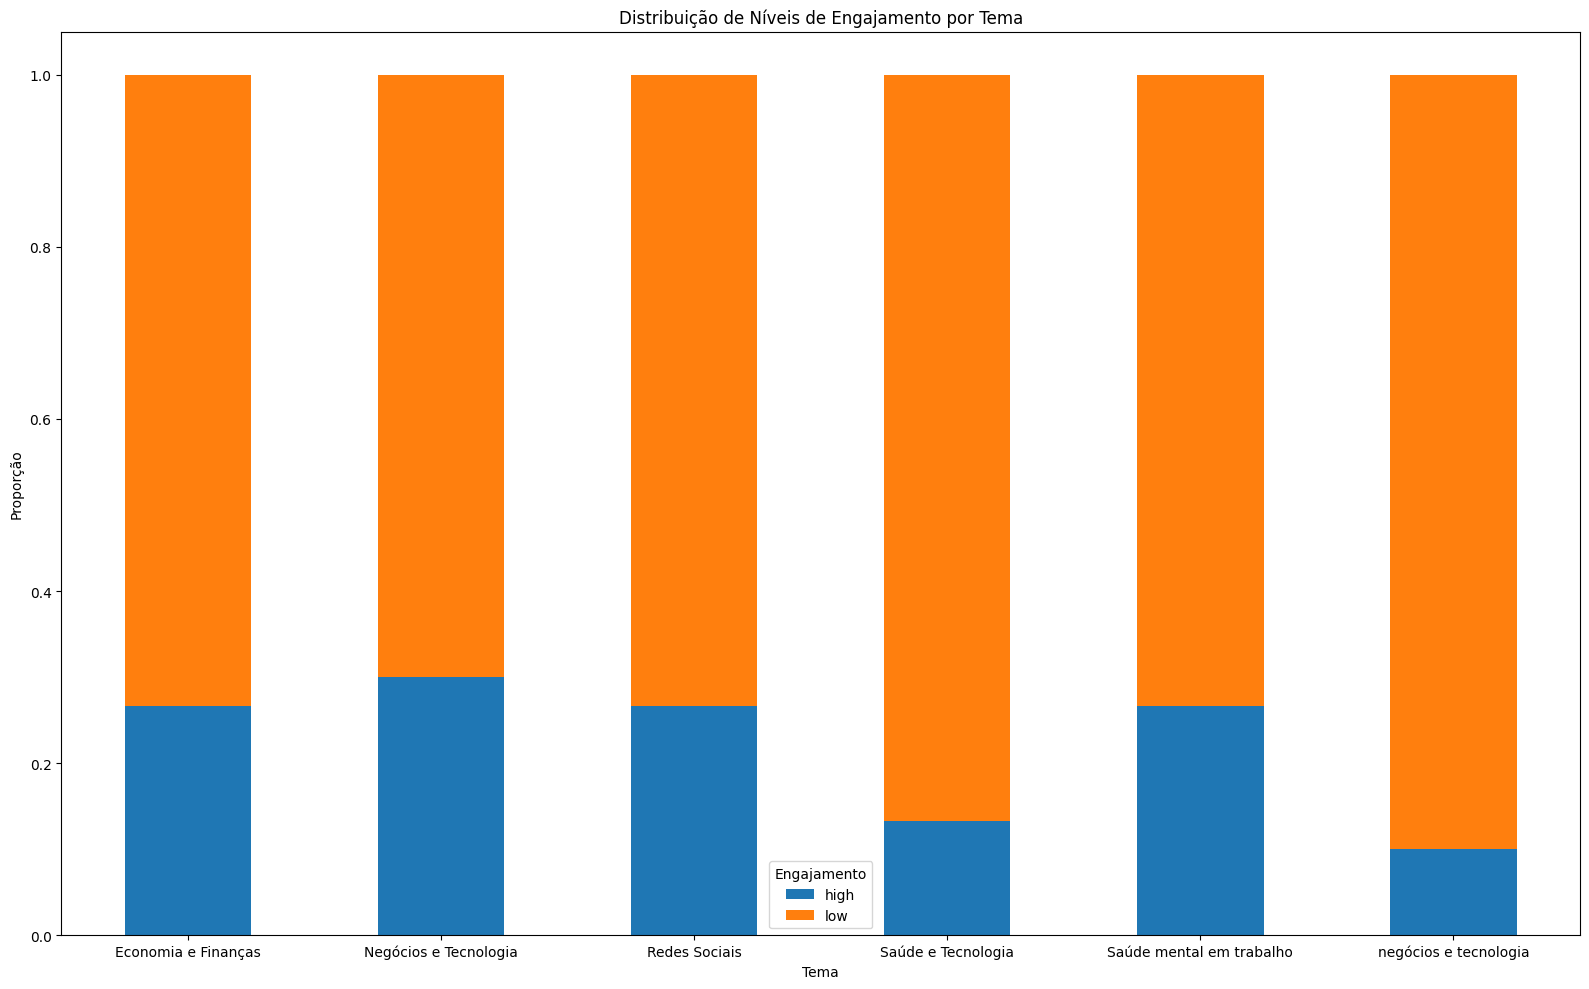

In [29]:
cluster_tema = sorted(df['tema_geral'].unique().tolist())
print(cluster_tema)

print("\nDistribuição de Engajamento por tema:")
engagement_by_cluster = df.groupby('tema_geral')['engagement'].value_counts(normalize=True).unstack(fill_value=0)
print(engagement_by_cluster)

engagement_by_cluster.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Distribuição de Níveis de Engajamento por Tema')
plt.xlabel('Tema')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.legend(title='Engajamento')
plt.tight_layout()
plt.show()

Assim conseguimos analisar qual assunto (cluster) apresenta maior engajamento, e quais assuntos são considerados "menos populares".
Vale resaltar que os temas do grafico acima não estão de acordo com o número do cluster, podendo causar confusão se comparado com os gráficos anteriores em que só é tratado o número dos clusters.






---


## Conclusão
A análise não supervisionada dos dados de postagens revelou distintos padrões de engajamento associados a temas e estilos de conteúdo específicos. O agrupamento por K-Means, utilizando embeddings de texto e características numéricas, permitiu categorizar as postagens em clusters, cada um com um perfil de postagem característico, analisado pela LLM llama 3.1.
Essa análise pode variar de acordo com a quantidade de clusters determinados e a quantidade de amostras que a LLM irá analisar para classificar um tema ao cluster, neste trabalho foi usado 6 clusters (usando o método do cotovelo calculando o valor da inércia) e todas as amostras para a LLM analisar e rotular.Mudando esses parâmetros se tera grupos de posts diferentes.